In [204]:
%pip install lightgbm

# Load necessary libraries
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('datasets/train.csv')

Note: you may need to restart the kernel to use updated packages.


In [205]:
# Split features and target variable
X = df.drop(columns=['obese_category'])
y = df['obese_category']

# Apply label encoding to the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply one-hot encoding to categorical features if needed
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [206]:
# Initialize LGBM classifier with the best parameters
best_params = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42,
    "num_class": 7,
    'learning_rate': 0.04,
    'n_estimators': 500,
    'lambda_l1': 0.01,
    'lambda_l2': 0.04,
    'max_depth': 10,
    'colsample_bytree': 0.41,
    'subsample': 0.95,
    'min_child_samples': 26
}

lgb_classifier = lgb.LGBMClassifier(**best_params)



In [207]:
# Train LGBM classifier with best parameters
lgb_classifier_best = lgb.LGBMClassifier(**best_params)
lgb_classifier_best.fit(X_train, y_train)

# Predictions on the test set
y_pred = lgb_classifier_best.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy:  0.901252408477842
Balanced Accuracy:  0.8908766708156621
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       524
           1       0.88      0.88      0.88       626
           2       0.87      0.87      0.87       543
           3       0.97      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.79      0.79      0.79       484
           6       0.79      0.81      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



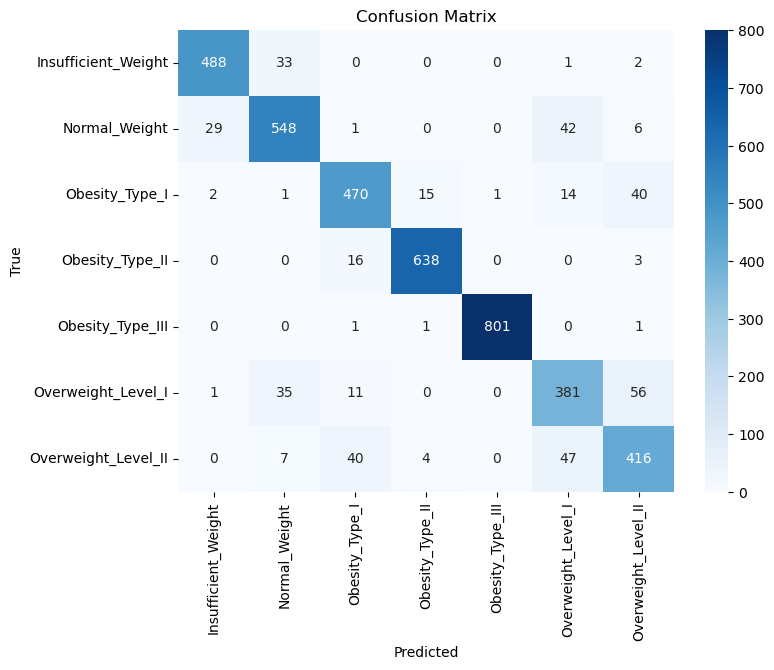

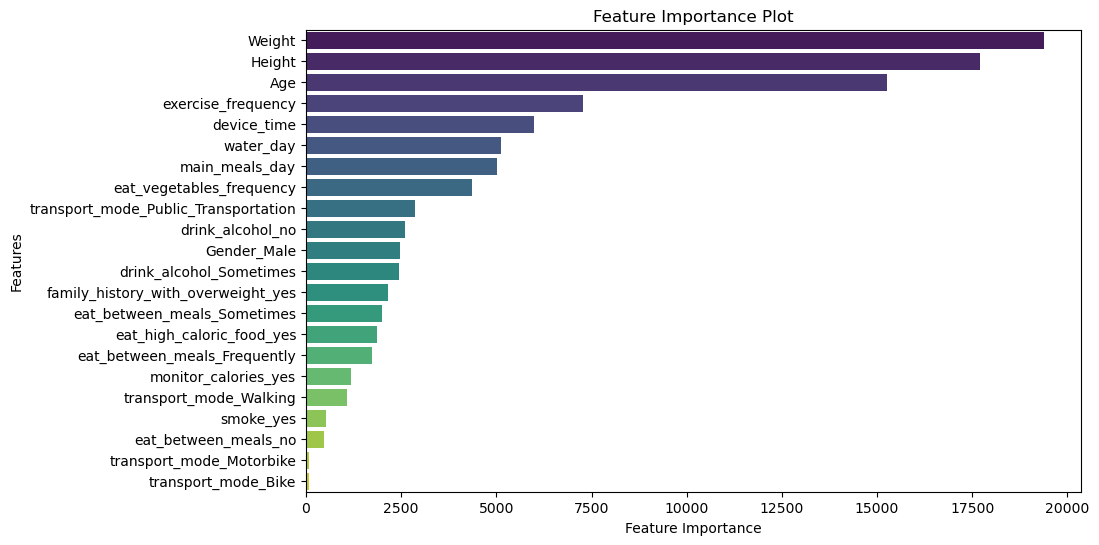

In [208]:
# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature importance analysis
feature_importance = lgb_classifier_best.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=X_encoded.columns[sorted_idx], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()
